In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import cv2
from tensorflow.keras.applications import VGG16

In [2]:
X = np.load('catdog.npy')

In [3]:
y1 = np.repeat(0,2000)
y2 = np.repeat(1,2000)
y = np.concatenate([y1,y2])

In [4]:
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [5]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

In [15]:
base_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=input_shape)

In [19]:
input_data = base_model.predict(X_train)

In [21]:
input_x = input_data.reshape(-1,4*4*512)

In [28]:
input_shape = input_x.shape[1]
output_shape = y_train.shape[1]

In [29]:
model = Sequential()
model.add(Dense(128,activation='relu',input_shape=(input_shape,)))
model.add(Dense(1,activation='sigmoid'))

In [31]:
opt = 'adam'
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
             loss = loss,
             metrics=metrics)

In [32]:
model.fit(input_x,
         y_train,
         epochs=10,
         batch_size=400)

Epoch 1/10
8/8 [==============================] - 0s 19ms/step - loss: 10.5504 - accuracy: 0.7566
Epoch 2/10
8/8 [==============================] - 0s 19ms/step - loss: 0.4750 - accuracy: 0.8953
Epoch 3/10
8/8 [==============================] - 0s 20ms/step - loss: 0.1924 - accuracy: 0.9406
Epoch 4/10
8/8 [==============================] - 0s 21ms/step - loss: 0.1333 - accuracy: 0.9384
Epoch 5/10
8/8 [==============================] - 0s 24ms/step - loss: 0.0932 - accuracy: 0.9578
Epoch 6/10
8/8 [==============================] - 0s 24ms/step - loss: 0.0623 - accuracy: 0.9706
Epoch 7/10
8/8 [==============================] - 0s 26ms/step - loss: 0.0437 - accuracy: 0.9781
Epoch 8/10
8/8 [==============================] - 0s 24ms/step - loss: 0.0296 - accuracy: 0.9862
Epoch 9/10
8/8 [==============================] - 0s 18ms/step - loss: 0.0218 - accuracy: 0.9906
Epoch 10/10
8/8 [==============================] - 0s 22ms/step - loss: 0.0172 - accuracy: 0.9909


In [34]:
model.save('model.h5')

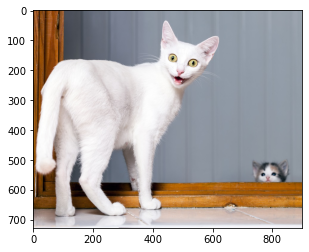

In [47]:
import matplotlib.pyplot as plt
img = plt.imread('./train/2.jpg')
plt.imshow(img)

In [48]:
img = cv2.resize(img,(150,150)).reshape(1,150,150,3)

In [49]:
np.where(model.predict(base_model.predict(img).reshape(1,4*4*512))>0.5,'dog','cat')

array([['cat']], dtype='<U3')

In [33]:
model.evaluate(base_model.predict(X_test).reshape(-1,4*4*512),y_test)

25/25 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.9550


[0.17195406556129456, 0.9549999833106995]

In [13]:
model = Sequential()
model.add(Conv2D(64,(5,5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(output_shape,activation='sigmoid'))

In [14]:
opt = 'adam'
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt,
             loss = loss,
             metrics=metrics)

In [15]:
model.fit(X_train,
         y_train,
         epochs=10,
         batch_size=400)

Epoch 1/10
8/8 [==============================] - 81s 7s/step - loss: 281.5682 - accuracy: 0.5113
Epoch 2/10
8/8 [==============================] - 53s 7s/step - loss: 1.3233 - accuracy: 0.5175
Epoch 3/10
8/8 [==============================] - 54s 7s/step - loss: 0.6734 - accuracy: 0.5675
Epoch 4/10
8/8 [==============================] - 53s 7s/step - loss: 0.6050 - accuracy: 0.6806
Epoch 5/10
8/8 [==============================] - 52s 7s/step - loss: 0.5633 - accuracy: 0.7059
Epoch 6/10
8/8 [==============================] - 52s 6s/step - loss: 0.5671 - accuracy: 0.6897
Epoch 7/10
8/8 [==============================] - 50s 6s/step - loss: 0.5061 - accuracy: 0.7481
Epoch 8/10
8/8 [==============================] - 51s 6s/step - loss: 0.4435 - accuracy: 0.8012
Epoch 9/10
8/8 [==============================] - 52s 6s/step - loss: 0.3987 - accuracy: 0.8216
Epoch 10/10
8/8 [==============================] - 50s 6s/step - loss: 0.3593 - accuracy: 0.8438


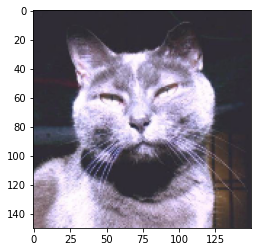

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_train[72].astype(np.int32))

In [38]:
str(np.where(model.predict(X_train[[72]])>0.5,'dog','cat')[0])

"['cat']"

In [39]:
model.evaluate(X_test,y_test)

25/25 [==============================] - 3s 122ms/step - loss: 0.7807 - accuracy: 0.6413


[0.7807131409645081, 0.6412500143051147]

In [41]:
a = X_train[72].astype(np.int32)

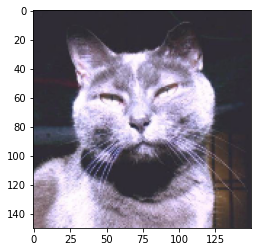

In [43]:
plt.imshow(a)

In [54]:
b.shape

(150, 150, 3)

In [44]:
b = cv2.rotate(a, cv2.ROTATE_180)

In [48]:
c = cv2.rotate(a, cv2.ROTATE_90_CLOCKWISE)
d = cv2.rotate(a, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [56]:
cat = np.zeros((1,150,150,3))
for i in X[:2000]:
    c1 = cv2.rotate(i,cv2.ROTATE_180).reshape(1,150,150,3)
    c2 = cv2.rotate(i,cv2.ROTATE_90_CLOCKWISE).reshape(1,150,150,3)
    c3 = cv2.rotate(i,cv2.ROTATE_90_COUNTERCLOCKWISE).reshape(1,150,150,3)
    cat= np.concatenate([cat,c1,c2,c3])


KeyboardInterrupt



In [ ]:
dog = np.zeros((1,150,150,3))
for i in X[2000:]:
    c1 = cv2.rotate(i,cv2.ROTATE_180).reshape(1,150,150,3)
    c2 = cv2.rotate(i,cv2.ROTATE_90_CLOCKWISE).reshape(1,150,150,3)
    c3 = cv2.rotate(i,cv2.ROTATE_90_COUNTERCLOCKWISE).reshape(1,150,150,3)
    cat= np.concatenate([dog,c1,c2,c3])

(4537, 150, 150, 3)